<a href="https://colab.research.google.com/github/barry80417/ML100-Days/blob/master/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%8302%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境準備

In [2]:
from google.colab import files
#上傳CSV
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
import pandas as pd
import numpy as np
import io
wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

1 - fixed acidity:固定酸度

2 - volatile acidity：揮發性酸度

3 - citric acid：檸檬酸

4 - residual sugar：殘糖

5 - chlorides：氯化物

6 - free sulfur dioxide：游離二氧化硫

7 - total sulfur dioxide：總二氧化硫

8 - density：密度

9 - pH：酸鹼度

10 - sulphates：硫酸鹽

11 - alcohol Output variable (based on sensory data):酒精輸出變量

12 - quality (score between 0 and 10)：品質

## 看各個資料關聯性

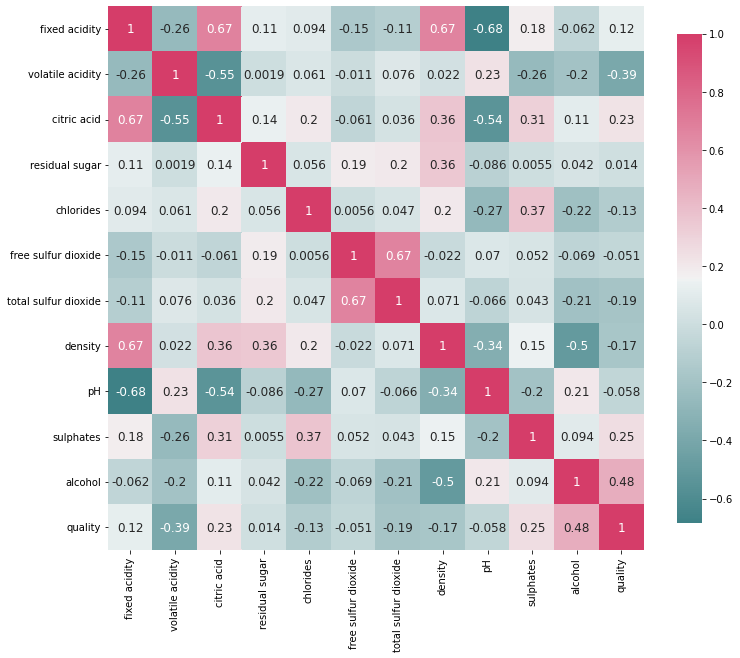

In [4]:
#@title train data relation
#看訓練資料中是否有所關聯
import matplotlib.pyplot as plt
import seaborn as sns
corr = wine.corr()
cmap = sns.diverging_palette(200, 0, as_cmap = True)
sns.heatmap(
    corr,
    cmap=cmap,
    square = False,
    cbar_kws = {'shrink': .9}, #顏色條大小
    ax = plt.subplots(figsize =(12,10))[1],
    annot = True,
    annot_kws = {'fontsize':12} #字體大小
)

## 檢視有無缺失值

In [ ]:
wine.count()

## 敘述性分析

In [ ]:
wine.describe()

In [5]:
wine.loc[wine['quality']>=7,'qual']='good'
wine.loc[wine['quality']<7,'qual']='bad'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
wine['qual'] = labelencoder.fit_transform(wine['qual'])

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = wine.drop('quality', axis = 1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.796875  , 0.765625  , 0.76171875, 0.76953125, 0.81568627])